# Hands on Face Verification using DeepFace

In [1]:
import os
import random
import shutil  # Use shutil for file copying instead of os.system

# Define dataset paths
dataset_path = "facescrub_dataset_cleaned2"
database_path = "database"
validation_path = "validation"

# Ensure directories exist
os.makedirs(database_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)

# Process each actor's directory
for actor in os.listdir(dataset_path):
    actor_dir = os.path.join(dataset_path, actor)
    
    # Check if it's a directory
    if os.path.isdir(actor_dir):
        images = os.listdir(actor_dir)
        random.shuffle(images)  # Shuffle the list of images randomly
        
        # Select images for database and validation
        database_images = images[:6]
        validation_images = images[6:12]
        
        # Copy database images to the database folder
        for img in database_images:
            src = os.path.join(actor_dir, img)
            dst = os.path.join(database_path, img)
            shutil.copy(src, dst)  # Use shutil.copy for copying files
        
        # Copy validation images to the validation folder
        for img in validation_images:
            src = os.path.join(actor_dir, img)
            dst = os.path.join(validation_path, img)
            shutil.copy(src, dst)  # Use shutil.copy for copying files

print("Database and validation images have been successfully selected and copied.")

Database and validation images have been successfully selected and copied.



File exists: database\Adam_McKay_737_442.jpeg
File exists: validation\Aaron_Eckhart_13_13.jpeg
Images loaded successfully!


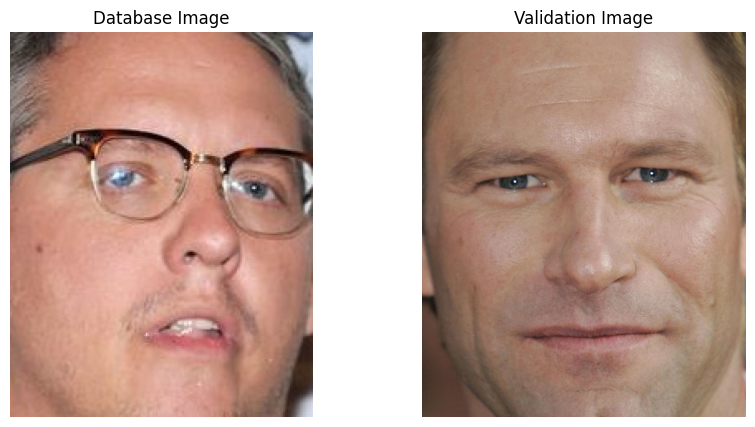

DeepFace Verification Result: {'verified': False, 'distance': 0.9343281753250836, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 182, 'h': 232, 'left_eye': (149, 96), 'right_eye': (71, 87)}, 'img2': {'x': 0, 'y': 37, 'w': 980, 'h': 1094, 'left_eye': (656, 434), 'right_eye': (294, 454)}}, 'time': 9.97}


In [2]:
import os
import random
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# Define dataset paths
database_path = "database"
validation_path = "validation"

# Ensure directories exist
if not os.path.exists(database_path) or not os.path.exists(validation_path):
    print("Error: Database or Validation directory not found!")
    exit()

# Select a random image from database and validation
database_images = os.listdir(database_path)
validation_images = os.listdir(validation_path)

if not database_images or not validation_images:
    print("Error: No images found in database or validation directories!")
    exit()

# Randomly select one image from each directory
img1_path = os.path.join(database_path, random.choice(database_images))
img2_path = os.path.join(validation_path, random.choice(validation_images))

# 1. Check if file exists
if not os.path.exists(img1_path) or not os.path.exists(img2_path):
    print("Error: Image file not found!")
    exit()
else:
    print("File exists:", img1_path)
    print("File exists:", img2_path)

# 2. Check if image can be read
image1 = cv2.imread(img1_path)
image2 = cv2.imread(img2_path)

if image1 is None or image2 is None:
    print("Error: One or both images are corrupted or cannot be read!")
    exit()
else:
    print("Images loaded successfully!")

# 3. Run DeepFace verification
try:
    metric = "cosine"  # Define similarity metric
    result = DeepFace.verify(img1_path, img2_path, model_name="VGG-Face", distance_metric=metric)

    # Display the images and result
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Database Image")
    axes[0].axis('off')  # Turn off axis
    axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Validation Image")
    axes[1].axis('off')  # Turn off axis
    plt.show()

    print("DeepFace Verification Result:", result)
except Exception as e:
    print("DeepFace encountered an error:", str(e))